In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

dataset = load_boston()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target, columns=['PRICE'])
df = pd.concat(objs=[X,y], axis=1).drop_duplicates().dropna()

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
plt.scatter(df['LSTAT'],df['PRICE'],c='b')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('LSTAT vs PRICE')
plt.show()

In [ ]:
# Dataset splitting
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import math

X = df[['LSTAT']]
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


model = linear_model.LinearRegression(normalize=False)
model.fit(X_train,y_train)

model.score(X_train,y_train)

In [ ]:
y_pre = model.predict(X_test)
mse = mean_squared_error(y_test, y_pre)
rmse = math.sqrt(mse)
r_squared = r2_score(y_test, y_pre)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R squared: {r_squared}')

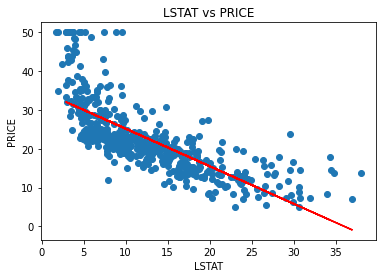

In [28]:
plt.scatter(X,y)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('LSTAT vs PRICE')
plt.plot(X_test, y_pre, c='red')
plt.show()